# LOADING LIBRARIES AND DATASETS

In [67]:
import numpy as np
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay , classification_report , roc_curve
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from matplotlib import pyplot as plt


In [3]:
news_df = pd.read_csv('C:/bramete-attachments/Project_data/Project_data/Projet_train.csv')


In [4]:
news_df.head()


,public_id,text,title,our rating
0,5a228e0e,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false
1,30c605a1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture
2,c3dea290,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture
3,f14e8eb6,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false
4,faf024d6,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false


# PreProcessing

In [5]:
news_df.isnull().sum()


public_id      0
text           0
title         23
our rating     0
dtype: int64

In [6]:
news_df.shape


(1264, 4)

In [7]:
news_df = news_df.fillna(' ')


In [8]:
news_df.isnull().sum()


public_id     0
text          0
title         0
our rating    0
dtype: int64

In [9]:
news_df['content'] = news_df['title']+' '+news_df['text']


In [10]:
news_df

,public_id,text,title,our rating,content
0,5a228e0e,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false,"You Can Be Fined $1,500 If Your Passenger Is U..."
1,30c605a1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture,Missouri lawmakers condemn Las Vegas shooting ...
2,c3dea290,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...
3,f14e8eb6,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false,Obama’s Daughters Caught on Camera Burning US ...
4,faf024d6,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...
...,...,...,...,...,...
1259,47423bb6,More than four million calls to the taxman are...,Taxman fails to answer four million calls a ye...,true,Taxman fails to answer four million calls a ye...
1260,097c142a,More under-18s are being taken to court for se...,Police catch 11‑year‑olds being used to sell d...,true,Police catch 11‑year‑olds being used to sell d...
1261,08bc59f4,The Government’s much vaunted Help to Buy Isa ...,"Help to Buy Isa scandal: 500,000 first-time bu...",false,"Help to Buy Isa scandal: 500,000 first-time bu..."
1262,af3393ce,The late Robin Williams once called cocaine “G...,A coke-snorting generation of hypocrites,true,A coke-snorting generation of hypocrites The l...


In [12]:
X = news_df.drop('our rating',axis=1)
y = news_df['our rating']

In [13]:
print(X)


     public_id                                               text   
0     5a228e0e  Distracted driving causes more deaths in Canad...  \
1     30c605a1  Missouri politicians have made statements afte...   
2     c3dea290  Home Alone 2: Lost in New York is full of viol...   
3     f14e8eb6  But things took a turn for the worse when riot...   
4     faf024d6  It’s no secret that Epstein and Schiff share a...   
...        ...                                                ...   
1259  47423bb6  More than four million calls to the taxman are...   
1260  097c142a  More under-18s are being taken to court for se...   
1261  08bc59f4  The Government’s much vaunted Help to Buy Isa ...   
1262  af3393ce  The late Robin Williams once called cocaine “G...   
1263  a39d07df  The late Robin Williams once called cocaine “G...   

                                                  title   
0     You Can Be Fined $1,500 If Your Passenger Is U...  \
1         Missouri lawmakers condemn Las Vegas shooti

In [14]:
ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [15]:
news_df['content'] = news_df['content'].apply(stemming)


In [16]:
X = news_df['content'].values
y = news_df['our rating'].values

In [17]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [18]:
print(X)


  (0, 19679)	0.0889019850867126
  (0, 19398)	0.07374732659317924
  (0, 19322)	0.03982295495779239
  (0, 19097)	0.04599565053912262
  (0, 18881)	0.031072924053682713
  (0, 18010)	0.03166167225438818
  (0, 17862)	0.05907050024680531
  (0, 17798)	0.03727333947768937
  (0, 17796)	0.05979481720738721
  (0, 17633)	0.04995521311135228
  (0, 17202)	0.08278205043399751
  (0, 17032)	0.04289340588115627
  (0, 17001)	0.06642607865925294
  (0, 16273)	0.024926188929705568
  (0, 16028)	0.0418188061357687
  (0, 15949)	0.0918167742748158
  (0, 15845)	0.17319740982701234
  (0, 15832)	0.08806702508524764
  (0, 15557)	0.06846235194192914
  (0, 15531)	0.04395369352097257
  (0, 15321)	0.07749707578274741
  (0, 14412)	0.08278205043399751
  (0, 14244)	0.2053870558257874
  (0, 14133)	0.03475432305369074
  (0, 13953)	0.04486876048993836
  :	:
  (1263, 7300)	0.11448913887753549
  (1263, 7070)	0.12624254428118722
  (1263, 6391)	0.07597500085419137
  (1263, 6176)	0.08213414851090248
  (1263, 5940)	0.09529509955573

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)


In [20]:
X_train.shape


(1011, 20301)

In [21]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [22]:
# on training set
train_y_pred = model.predict(X_train)
print(accuracy_score(train_y_pred,Y_train))

0.8130563798219584


In [23]:
# on testing set
testing_y_pred = model.predict(X_test)
print(accuracy_score(testing_y_pred,Y_test))

0.5454545454545454


In [24]:
input_data = X_test[10]
prediction = model.predict(input_data)

In [25]:
if prediction[0] == 'False':
    print('The News Is Real')
else:
    print('The News is Fake')

The News is Fake


In [26]:
news_df['content'][2]


'cbc cut donald trump home alon cameo broadcast home alon lost new york full violenc opinion exce physic comedi origin film borderlin barbar main antagonist subject brick thrown atop build shot stapl gun head lit afir electrocut actual hard watch cbc tv canada follow scene much remov broadcast film right comicbook com report cbc edit donald trump cameo movi peopl watch quick report suspici omiss social media outrag snowflak thrill guy biggest bush leagu journalist time edit trump cameo home alon kind state sponsor bullshit defund jame jameseast decemb http twitter com teko statu cbc cut trump home alon disgust pathet wrestl fan forev wrestlingfan decemb http twitter com adimarco statu accord cbc movi edit allow commerci time within format explan fail pass smell test donald trump formal announc campaign june first time cbc cut trump cameo appear acknowledg twitter around christma year thank cbc cut realdonaldtrump home alon colt mccaullani dennisgrimbl decemb either happen first year cb

In [49]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform( news_df['content'].values)
tfidf = transformer.fit_transform(counts)


In [50]:
print(f"The shape of X_train is: {X_train.shape[0]}")
print(f"The shape of X_test is: {X_test.shape[0]}")

The shape of X_train is: 1011
The shape of X_test is: 253


In [54]:
def train(model , model_name):
    model.fit(X_train,Y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train,Y_train)}")
    
    print(f"testing accuracy of {model_name} is {model.score(X_test,Y_test)}")
    
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        Y_test
    )
def class_report(model):
    print(classification_report(
        Y_test,
        model.predict(X_test)
    ))

In [52]:
model_lr = LogisticRegression()


In [55]:
train(model_lr, 'LogisticRegression')


Training accuracy of LogisticRegression is 0.8130563798219584
testing accuracy of LogisticRegression is 0.5454545454545454


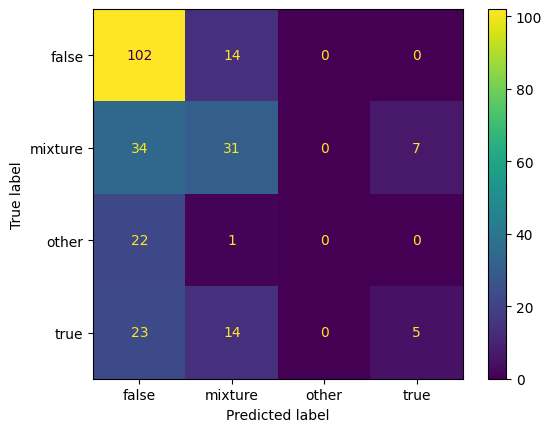

In [56]:
conf_matrix(model_lr)


In [57]:
class_report(model_lr)


              precision    recall  f1-score   support

       false       0.56      0.88      0.69       116
     mixture       0.52      0.43      0.47        72
       other       0.00      0.00      0.00        23
        true       0.42      0.12      0.19        42

    accuracy                           0.55       253
   macro avg       0.37      0.36      0.34       253
weighted avg       0.47      0.55      0.48       253



C:\Users\auaza\anaconda3\envs\test\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\auaza\anaconda3\envs\test\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\auaza\anaconda3\envs\test\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM

In [58]:
svc_model= SVC()


In [59]:
train(svc_model, 'SVM')


Training accuracy of SVM is 0.9584569732937686
testing accuracy of SVM is 0.5810276679841897


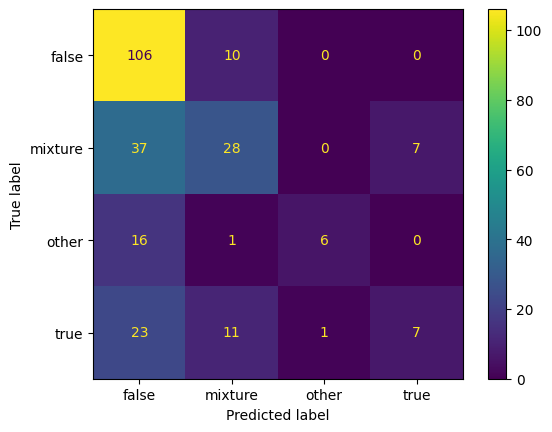

In [60]:
conf_matrix(svc_model)


In [61]:
class_report(svc_model)


              precision    recall  f1-score   support

       false       0.58      0.91      0.71       116
     mixture       0.56      0.39      0.46        72
       other       0.86      0.26      0.40        23
        true       0.50      0.17      0.25        42

    accuracy                           0.58       253
   macro avg       0.62      0.43      0.46       253
weighted avg       0.59      0.58      0.53       253



# DecisionTreeClassifier

In [62]:
depth_num= range(50, 71, 2)
training_acc= []
testing_acc = []
for depth in depth_num:
    tree_model = DecisionTreeClassifier(max_depth=depth,random_state=42)
    tree_model.fit(X_train,Y_train)
    training_acc.append(tree_model.score(X_train,Y_train))
    testing_acc.append(tree_model.score(X_test,Y_test))

In [63]:
print("Training Accuracy Scores:", training_acc[:3])
print("testing Accuracy Scores:", testing_acc[:3])

Training Accuracy Scores: [0.9970326409495549, 0.9970326409495549, 0.9970326409495549]
testing Accuracy Scores: [0.525691699604743, 0.525691699604743, 0.525691699604743]


In [69]:
# final model
tree_final_model=DecisionTreeClassifier(max_depth=58,random_state=42)
tree_final_model.fit(X_train,Y_train)
tree_training_acc = tree_final_model.score(X_train,Y_train)
tree_testing_acc = tree_final_model.score(X_test,Y_test)
print(f"Training accuracy of DesicionTreeClassifier is {tree_training_acc}")
print(f"testing accuracy of DesicionTreeClassifier is {tree_testing_acc}")

Training accuracy of DesicionTreeClassifier is 0.9970326409495549
testing accuracy of DesicionTreeClassifier is 0.525691699604743


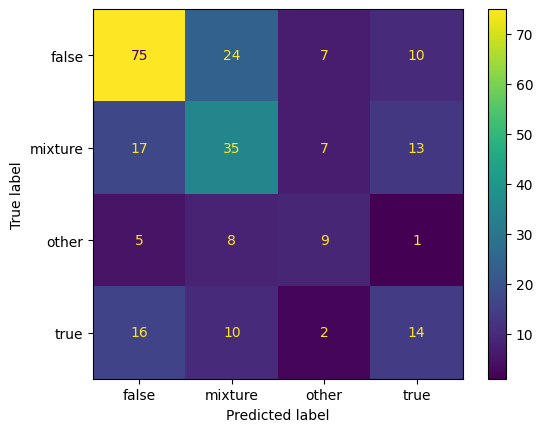

In [70]:
conf_matrix(tree_final_model)


In [71]:
class_report(tree_final_model)


              precision    recall  f1-score   support

       false       0.66      0.65      0.66       116
     mixture       0.45      0.49      0.47        72
       other       0.36      0.39      0.37        23
        true       0.37      0.33      0.35        42

    accuracy                           0.53       253
   macro avg       0.46      0.46      0.46       253
weighted avg       0.53      0.53      0.53       253



# RandomForestClassifier

In [72]:
clf= RandomForestClassifier(random_state=42)
params={
    "n_estimators": range(50,125,25),
    "max_depth": range(60,81,2)
}
params

{'n_estimators': range(50, 125, 25), 'max_depth': range(60, 81, 2)}

In [73]:
rfc_model = GridSearchCV(
    clf,
    param_grid= params,
    cv= 5,
    n_jobs= -1,
    verbose=1
)

In [75]:
rfc_model.fit(X_train,Y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(60, 81, 2),
                         'n_estimators': range(50, 125, 25)},
             verbose=1)

In [76]:
rfc_model.predict(X_test)

array(['false', 'false', 'mixture', 'false', 'false', 'false', 'false',
       'mixture', 'false', 'false', 'false', 'false', 'false', 'false',
       'mixture', 'mixture', 'false', 'false', 'false', 'false', 'false',
       'mixture', 'false', 'false', 'false', 'false', 'false', 'mixture',
       'mixture', 'true', 'false', 'false', 'mixture', 'false', 'false',
       'false', 'mixture', 'false', 'mixture', 'mixture', 'false',
       'false', 'false', 'false', 'false', 'false', 'true', 'false',
       'false', 'false', 'false', 'true', 'false', 'mixture', 'false',
       'mixture', 'false', 'false', 'false', 'false', 'false', 'false',
       'false', 'false', 'false', 'mixture', 'false', 'false', 'false',
       'true', 'false', 'false', 'false', 'mixture', 'mixture', 'mixture',
       'false', 'false', 'false', 'false', 'false', 'mixture', 'false',
       'false', 'false', 'false', 'mixture', 'false', 'false', 'mixture',
       'false', 'false', 'false', 'false', 'false', 'false', 'o

In [77]:
acc_train = rfc_model.score(X_train , Y_train)
acc_test = rfc_model.score(X_test , Y_test)

print(f"Training accuracy: {round(acc_train , 4)}")
print(f"test accuracy: {round(acc_test , 4)}")

Training accuracy: 0.9941
test accuracy: 0.5652


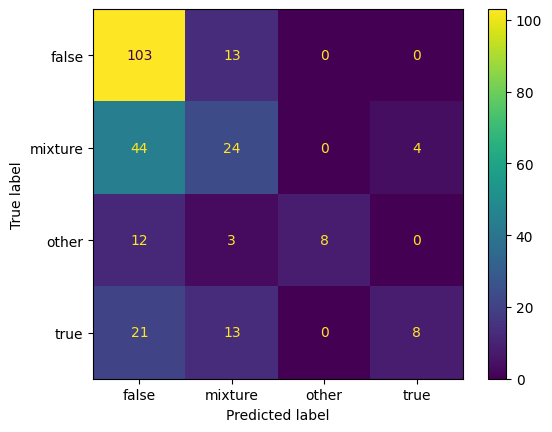

In [78]:
conf_matrix(rfc_model)


In [79]:
class_report(rfc_model)


              precision    recall  f1-score   support

       false       0.57      0.89      0.70       116
     mixture       0.45      0.33      0.38        72
       other       1.00      0.35      0.52        23
        true       0.67      0.19      0.30        42

    accuracy                           0.57       253
   macro avg       0.67      0.44      0.47       253
weighted avg       0.59      0.57      0.52       253



In [80]:
models = pd.DataFrame({
    
    "Models": ["Logistic Regression" , "SVM", "DecisionTreeClassifier","RandomForestClassifier"],
    "Score":[model_lr.score(X_test,Y_test) ,svc_model.score(X_test,Y_test) ,tree_testing_acc,acc_test ]
    
})
models.sort_values(by="Score" , ascending=False)

,Models,Score
1,SVM,0.581028
3,RandomForestClassifier,0.565217
0,Logistic Regression,0.545455
2,DecisionTreeClassifier,0.525692
